<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jen_Banks_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##1) Write a function

In [79]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import ttest_ind,ttest_1samp,chi2,chi2_contingency



0.011380504700643244

A. Function Based on Lecture

In [92]:
# By hand computation

user_prob= 1/1000
nonuser_prob= 1-user_prob

neg_given_user= 0.08
pos_given_user= 1

prob_user_pos= (pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
prob_user_pos

0.012357884330202669

In [0]:
# Function Based on Lecture.( I just made this to satisfy the requirement)
# I am still in teh process of working out the validity of the concept.

def bayes_lec(user_prob, neg_given_user, pos_given_user, n):
    posterior_list= []
    for test in range(n):
      nonuser_prob= 1-user_prob
      user_prob=(pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
      if user_prob>=0.95:
        print('Reaches approx 95% at n =', len(posterior_list))
        print(' ')
        break
      posterior_list.append(user_prob)
    return posterior_list
      

In [89]:
# Running the probability results for the first 3 tests 

bayes_lec(0.001, 0.08,1, 3)

[0.012357884330202669, 0.13525210993291495, 0.6615996951348605]

B. Function Based on how I find the concept valid

In [91]:
# By hand computation

user_prob= 1/1000
nonuser_prob= 1-user_prob

neg_given_user= 0.08
pos_given_user= 1-neg_given_user

prob_user_pos= (pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
prob_user_pos

0.011380504700643244

In [0]:
# Creating a function that will determine the number of times a test should be 
# conducted to get at least 95% probability that he is a user given that he tested positive

def bayes(user_prob, neg_given_user, n):
  posterior_list = []
  for i in range(n):
    pos_given_user= 1-neg_given_user
    nonuser_prob= 1-user_prob
    user_prob=(pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))    
    if user_prob>=0.95:
      print('Reaches approx 95% at n =', len(posterior_list))
      print(' ')
      break
    posterior_list.append(user_prob)
  return posterior_list

1.What is the probability that a person is drunk after one positive breathalyzer test?

In [81]:
# Result after 1 breathalyzer test
bayes(0.001, 0.08, 1)

[0.011380504700643244]

2.What is the probability that a person is drunk after two positive breathalyzer tests?

In [82]:
# Result after 2 breathalyzer test2
bayes(0.001, 0.08, 2)

[0.011380504700643244, 0.11690607734806628]

In [83]:
# Given an arbitrary 100 tests, function will break when 95% is reached.
bayes(0.001, 0.08, 100)

Reaches approx 95% at n = 4
 


[0.011380504700643244,
 0.11690607734806628,
 0.6035517634803313,
 0.9459680554381814]

Plotting the values for specific parameters

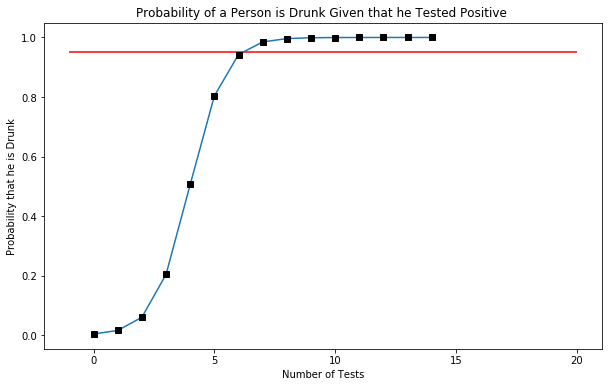

In [6]:
# Given values, can be changed 
#  prior probability = 0.001
#  false positive = 0.2
#  number of tests= 15

def bayes2(user_prob, neg_given_user, n):
  posterior_list = []
  for i in range(n):
    pos_given_user= 1-neg_given_user
    nonuser_prob= 1-user_prob
    user_prob=(pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
             
    posterior_list.append(user_prob)

  return posterior_list

vals=list(bayes2(0.001,0.2,15))

plt.figure(figsize=(10,6))

plt.plot(vals,)
plt.plot(vals, 'ks')

plt.xlabel('Number of Tests')
plt.ylabel('Probability that he is Drunk')
plt.title('Probability of a Person is Drunk Given that he Tested Positive ')

plt.hlines(xmin=-1, xmax= 20, y=0.95, color='r', label ='95%')     # 95% marker

plt.show();

##2) Explore scipy.stats.bayes_mvs

In [0]:
# Preparing column headers for dataframe

column_headers= ['party',
                   'handicapped-infants', 'water-project-cost-sharing',
                   'adoption-of-the-budget-resolution',
                   'physician-fee-freeze',
                   'el-salvador-aid',
                   'religious-groups-in-schools',
                   'anti-satellite-test-ban',
                   'aid-to-nicaraguan-contras',
                   'mx-missile',
                   'immigration',
                   'synfuels-corporation-cutback',
                   'education-spending',
                   'superfund-right-to-sue',
                   'crime','duty-free-exports',
                   'export-administration-act-south-africa']

In [8]:
#Reading data

df_vot=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names= column_headers, na_values= '?')
print(df_vot.shape)


(435, 17)


In [10]:
#recode data as numeric

df_vot=df_vot.replace({'y':1, 'n':0})
print(df_vot.shape)


(435, 17)


In [11]:
#Creating a new dataframe for republicans
#Also checking a particular republican attribute(crime)

rep=df_vot[df_vot['party']=='republican'].dropna()
print(len(rep))
rep['anti-satellite-test-ban'].head()

108


8     0.0
28    1.0
30    0.0
33    0.0
35    0.0
Name: anti-satellite-test-ban, dtype: float64

In [0]:
# Defining the function that will calculate
#   a. standard error 
#   b. margin of error
#   c. confindence interval

def confidence_interval(data, confidence =0.95):
  data_array= np.array(data)                          # converting data to array
  mean= np.mean(data)                                 # mean/x_bar
  n=len(data)                                         # number count 
  stderr= np.std(data_array,ddof=1)/np.sqrt(n)        # standadr error
  moe=stderr*st.t.ppf(((1+confidence)/2),n-1)         # margin of error
  return( mean, mean - moe, mean + moe)               # mean, lower bound, upper bound

In [13]:
#generating the mean, lower and upper bounds
CI=confidence_interval(rep['anti-satellite-test-ban'])
CI

(0.26851851851851855, 0.18358393802160433, 0.35345309901543276)

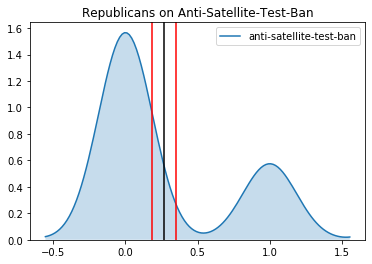

In [14]:
#Plotting using sns kernel density
#Values based on function

import seaborn as sns

def plot_confidence_interval(data, confidence= 0.95):
  sns.kdeplot(rep['anti-satellite-test-ban'], shade=True)
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k')

  plt.title('Republicans on Anti-Satellite-Test-Ban')
  plt.show()

plot_confidence_interval(rep['anti-satellite-test-ban'], confidence=0.95)

In [15]:
# Computing mean and Confidence interval using stats.bayes_mvs

mean_confidence_interval= st.bayes_mvs(rep['anti-satellite-test-ban'], alpha=0.95)[0][1]
mean_confidence_interval

(0.18358393802160433, 0.35345309901543276)

In [16]:
# Compare the value above in comparison to the one computed with a function
CI=confidence_interval(rep['anti-satellite-test-ban'])
CI

(0.26851851851851855, 0.18358393802160433, 0.35345309901543276)

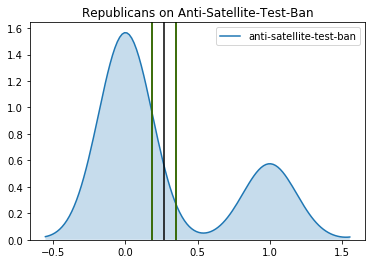

In [17]:
#Plotting both set of values:
def plot_confidence_interval(data, confidence= 0.95):
  
  sns.kdeplot(rep['anti-satellite-test-ban'], shade=True)
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k')
  plt.axvline(x=mean_confidence_interval[0],color='green')     #Bayes lower bound
  plt.axvline(x=mean_confidence_interval[1],color='green')     #Bayes upper bound

  plt.title('Republicans on Anti-Satellite-Test-Ban')
  plt.show()

plot_confidence_interval(rep['anti-satellite-test-ban'], confidence=0.95)

#Can really zoom it out because my values(CIs) are exactly the same as displayed.

##3) In your own words, summarize the difference between Bayesian and Frequentist statistics

The frequentist statistics is based on the concept of likehood.  This works well with a big sample size because you can get more information that way.  On Bayesian method, prior knowledge is considered in the computation. This works well for multiple number of testing as opposed to higher number of sample size. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective

In [0]:
#assigning column headers

column_headers1= ['sepal length in cm','sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

In [19]:
# Using the Iris data

df1=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header= None, names= column_headers1)
df1.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df1['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [21]:
#Grabbing data for iris-setosa only

setosa=df1[df1['class']=='Iris-setosa']
setosa.head(3)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [0]:
#Re-using same function to determine, mean, lower and upper bounds 

def confidence_interval_setosa(data, confidence =0.95):
  data_array= np.array(data)                          # converting data to array
  mean= np.mean(data)                                 # mean/x_bar
  n=len(data)                                         # number count 
  stderr= np.std(data_array,ddof=1)/np.sqrt(n)        # standadr error
  moe=stderr*st.t.ppf(((1+confidence)/2),n-1)         # margin of error
  return( mean, mean - moe, mean + moe)               # mean, lower bound, upper bound

In [41]:
#Computing CI using function/Frequentist method

CI_setosa=confidence_interval(setosa['sepal length in cm'])
CI_setosa

(5.005999999999999, 4.905823539430868, 5.106176460569131)

In [24]:
#Using Bayes to find CI

setosa_confidence_interval= st.bayes_mvs(setosa['sepal length in cm'], alpha=0.95)[0][1]
setosa_confidence_interval

(4.905823539430869, 5.106176460569132)

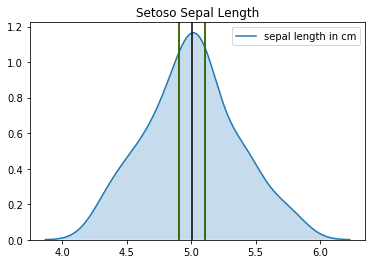

In [25]:
#Plotting both CIs computed by two methods but difference is very negligible

def plot_confidence_interval(data, confidence= 0.95):
  
  sns.kdeplot(setosa['sepal length in cm'], shade=True)
  plt.axvline(x=CI_setosa[1], color='red')
  plt.axvline(x=CI_setosa[2], color='red')
  plt.axvline(x=CI_setosa[0], color='k')
  plt.axvline(x=setosa_confidence_interval[0],color='green')     #Bayes lower bound
  plt.axvline(x=setosa_confidence_interval[1],color='green')     #Bayes upper bound

  plt.title('Setoso Sepal Length')
  plt.show()

plot_confidence_interval(setosa['sepal length in cm'], confidence=0.95)

## Using Chi Square Contingency test to check for independence of two attributes

In [26]:
#Checking width range, to prepare for categorizing it
print(setosa['sepal width in cm'].min(), setosa['sepal width in cm'].max())
(setosa['sepal width in cm'].max()- setosa['sepal width in cm'].min())/5

2.3 4.4


0.4200000000000001

In [27]:
print(setosa['sepal length in cm'].min(), setosa['sepal length in cm'].max())
(setosa['sepal length in cm'].max() - setosa['sepal length in cm'].min())/5

4.3 5.8


0.3

In [28]:
#Categorizing Width
cut_point_width=(2, 2.5, 3 , 3.5 , 4 , 4.5)
width_labels= ['2-2.5', '2.5-3', '3-3.5', '3.5-4', '4+']
setosa['width_categories']= pd.cut(setosa['sepal width in cm'],cut_point_width, labels=width_labels)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#Categorizing length
cut_point_length=(4.3, 4.6, 4.9 , 5.2 , 5.5 , 5.8)
length_labels= ['4.3-4.6', '4.6-4.9', '4.9-5.2', '5.2-5.5', '5.5+']
setosa['length_categories']= pd.cut(setosa['sepal length in cm'],cut_point_length, labels=length_labels)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#Creating a crosstab with margins
Width_Length_setoso_crosstab= pd.crosstab(setosa['width_categories'], setosa['length_categories'], margins = True)
Width_Length_setoso_crosstab

length_categories,4.3-4.6,4.6-4.9,4.9-5.2,5.2-5.5,5.5+,All
width_categories,,,,,,
2-2.5,1,0,0,0,0,1
2.5-3,2,3,1,0,0,6
3-3.5,4,8,12,3,0,27
3.5-4,1,0,5,4,2,12
4+,0,0,1,1,1,3
All,8,11,19,8,3,49


In [32]:
#Creating a crosstab without margins
Width_Length_setoso_crosstab1= pd.crosstab(setosa['width_categories'], setosa['length_categories'])
Width_Length_setoso_crosstab1

length_categories,4.3-4.6,4.6-4.9,4.9-5.2,5.2-5.5,5.5+
width_categories,,,,,
2-2.5,1,0,0,0,0
2.5-3,2,3,1,0,0
3-3.5,4,8,12,3,0
3.5-4,1,0,5,4,2
4+,0,0,1,1,1


In [33]:
width_2count= Width_Length_setoso_crosstab.iloc[0][0:5].values
width_25count= Width_Length_setoso_crosstab.iloc[1][0:5].values
width_3count= Width_Length_setoso_crosstab.iloc[2][0:5].values
width_35count= Width_Length_setoso_crosstab.iloc[3][0:5].values
width_4count= Width_Length_setoso_crosstab.iloc[4][0:5].values
print(width_2count)
print(width_25count)
print(width_3count)
print(width_35count)
print(width_4count)

[1 0 0 0 0]
[2 3 1 0 0]
[ 4  8 12  3  0]
[1 0 5 4 2]
[0 0 1 1 1]


Text(0, 0.5, 'width')

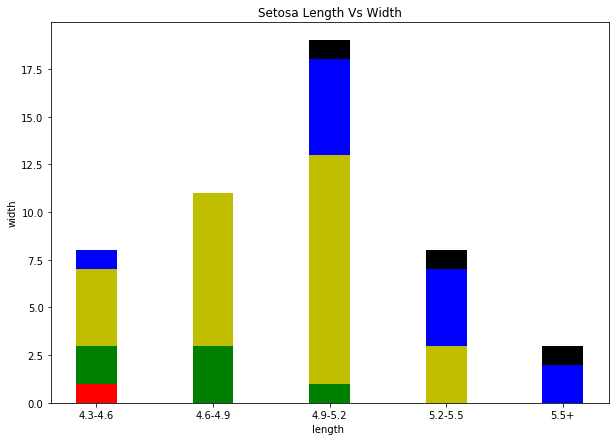

In [34]:
#Plotting bar charts for indices

plt.figure(figsize=(10,7))

p1= plt.bar(length_labels, width_2count, 0.35, color='r')
p2= plt.bar(length_labels, width_25count, 0.35, color='g', bottom = width_2count)
p3= plt.bar(length_labels, width_3count, 0.35, color='y',bottom = width_2count+ width_25count)
p4= plt.bar(length_labels, width_35count, 0.35, color='b',bottom = width_2count + width_25count + width_3count)
p5= plt.bar(length_labels, width_4count, 0.35, color='k',bottom = width_2count + width_25count + width_3count + width_35count)

plt.title( 'Setosa Length Vs Width')
plt.xlabel('length ')
plt.ylabel('width')

In [35]:
#Grabbing row sums, column sums, total  
row_sum= Width_Length_setoso_crosstab.iloc[0:5,5].values
column_sum= Width_Length_setoso_crosstab.iloc[5,0:5].values
total= Width_Length_setoso_crosstab.loc['All','All' ]

print(row_sum)
print(column_sum)
print (total)

[ 1  6 27 12  3]
[ 8 11 19  8  3]
49


In [36]:
#Creating an expected value table

expected=[]
for i in range(len(row_sum)):
  expected_row=[]
  for column in column_sum:
    expected_val=column*row_sum[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected=np.array(expected)

print(expected.shape)
print('  ')
print('Expected Values')
print(expected)



(5, 5)
  
Expected Values
[[ 0.16326531  0.2244898   0.3877551   0.16326531  0.06122449]
 [ 0.97959184  1.34693878  2.32653061  0.97959184  0.36734694]
 [ 4.40816327  6.06122449 10.46938776  4.40816327  1.65306122]
 [ 1.95918367  2.69387755  4.65306122  1.95918367  0.73469388]
 [ 0.48979592  0.67346939  1.16326531  0.48979592  0.18367347]]


In [37]:
#Converting dataframe to array values for observed data

observed= Width_Length_setoso_crosstab1.values
observed

array([[ 1,  0,  0,  0,  0],
       [ 2,  3,  1,  0,  0],
       [ 4,  8, 12,  3,  0],
       [ 1,  0,  5,  4,  2],
       [ 0,  0,  1,  1,  1]])

In [38]:
# Using numpy array broadcasting to calculate Chi- squared statistic
chi_squared_stat= ((observed - expected)**2/(expected)).sum()
chi_squared_stat

26.144675925925927

In [39]:
#Degrees of Freedom
dof= (len(row_sum)-1)*(len(column_sum)-1)
dof

16

In [40]:
#Running a chi squared test

chi2_contingency(observed)

(26.144675925925927,
 0.05202624063790944,
 16,
 array([[ 0.16326531,  0.2244898 ,  0.3877551 ,  0.16326531,  0.06122449],
        [ 0.97959184,  1.34693878,  2.32653061,  0.97959184,  0.36734694],
        [ 4.40816327,  6.06122449, 10.46938776,  4.40816327,  1.65306122],
        [ 1.95918367,  2.69387755,  4.65306122,  1.95918367,  0.73469388],
        [ 0.48979592,  0.67346939,  1.16326531,  0.48979592,  0.18367347]]))

Since p> 0.05, then I fail to reject the null hypothesis that the two attributes sepal width and length are independent from each other.

##Exploring Pymc3

In [73]:
import pymc3 as pm
!pip install arviz

y = 4+np.random.randn(100,1)
n= 500

with pm.Model()as model:
  mean=pm.Normal('mu', mu= 0, sd=20)
  likelihood=pm.Normal('y', mu = mean, sd= 1, observed = y)
  trace= pm.sample(n)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 1701.82it/s]
